<h1>1. Business Problem</h1>

# 2.  Data Analysis

**Local Outlier Factor**

Assuming, that the inlier data is Gaussian distributed, We will use Local Outlier Factor as a way to detect the outlier in our given dataset.

The Local Outlier Factor is an unsupervised anamoly detection method that computes a score called Local outlier factor(LOF). LOF measures the local  density deviation of a given datapoint with respect to its k- number of neighbors. 

The LOF is calulated as a ratio of the average local desity of its k-nearest neighbors and its own local neighbor. Any inlier will have the same local density as its neigbors but an outlier will have a much lower local density.

In [46]:
# Density Based Outlier Detection System (Local Outlier Factor-LOF)
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html
from sklearn.neighbors import LocalOutlierFactor
X = df.drop(['diagnosis','id'], axis=1) #features
y = df['diagnosis']

model = LocalOutlierFactor(contamination=0.02) #n_neighbors=20 default 
y_pred = model.fit_predict(X) # returns -1 for outliers and 1 for inliers
X_scores = model.negative_outlier_factor_

In [47]:
print('y_pred[:10] ',y_pred[:10])
print('y_pred values and counts: ',np.unique(y_pred,return_counts=True))

y_pred[:10]  [ 1  1  1  1  1 -1  1  1  1  1]
y_pred values and counts:  (array([-1,  1]), array([ 12, 557], dtype=int64))


In [48]:
outliers = pd.DataFrame()
outliers["values"] = y_pred
outliers["values"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    1
Name: values, Length: 569, dtype: int32

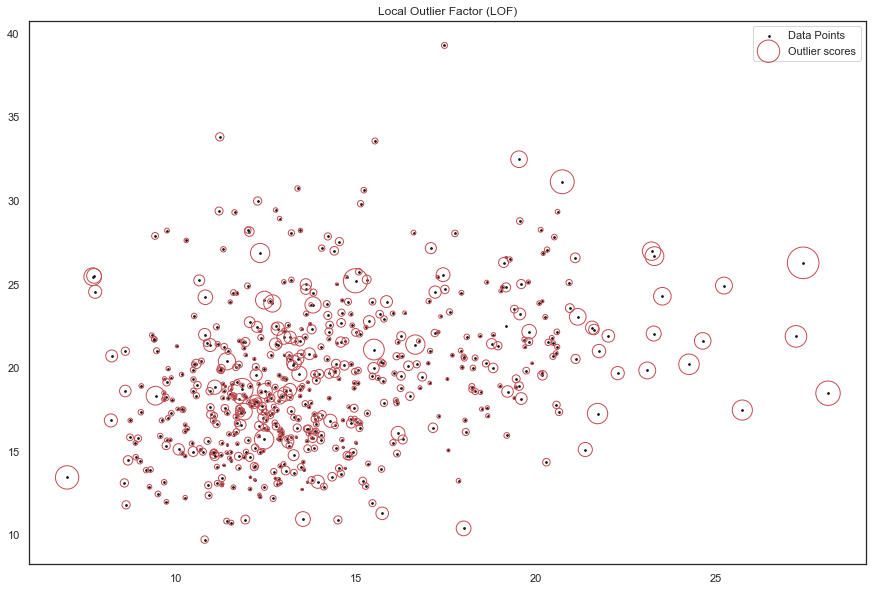

In [49]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

plt.figure(figsize=(15,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X.iloc[:,0], X.iloc[:,1], color = "k", s = 3, label = "Data Points")

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.legend()
plt.show()

In [50]:
filt = outliers["values"] == -1
outlier_index = outliers[filt].index.tolist()

In [51]:
#Outliers were removed from the data.
X = X.drop(outlier_index)
y = y.drop(outlier_index).values

In [52]:
print(X.shape)
print(y.shape)

(557, 30)
(557,)


Projecting the 30-dimensional data to 2D


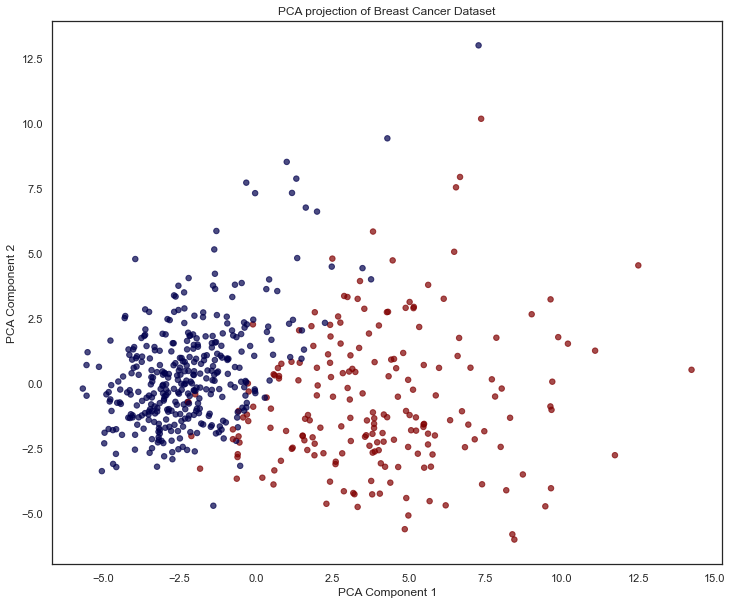

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting the 30-dimensional data to 2D')

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, alpha=0.7, s=30, cmap = 'seismic');
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA projection of Breast Cancer Dataset');

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 557 samples in 0.000s...
[t-SNE] Computed neighbors for 557 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 557 / 557
[t-SNE] Mean sigma: 1.443837
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.196274
[t-SNE] KL divergence after 1000 iterations: 0.958265


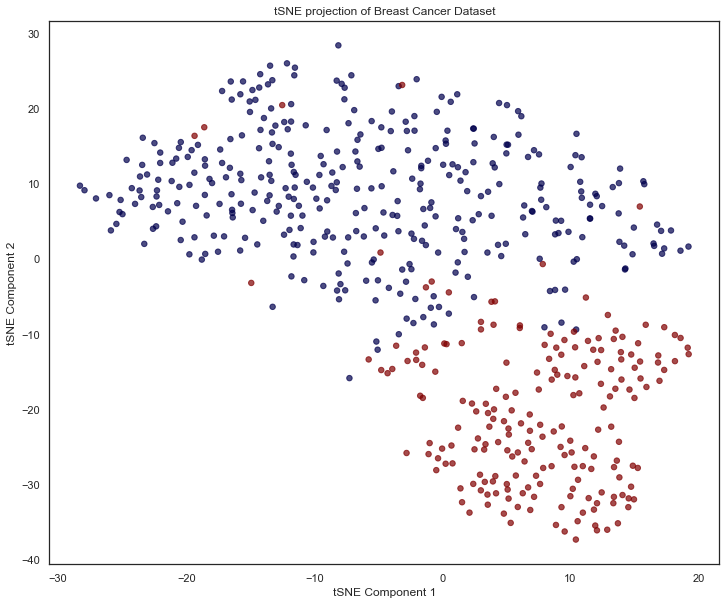

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


X_scaled = StandardScaler().fit_transform(X)

tSNE = TSNE(n_components=2, verbose = 1)#perplexity=40, n_iter=1000 can be used too 
tSNE_results = tSNE.fit_transform(X_scaled)


plt.figure(figsize=(12,10))
plt.scatter(tSNE_results[:, 0], tSNE_results[:, 1], c=y, alpha=0.7, s=30, cmap = 'seismic');
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.title('tSNE projection of Breast Cancer Dataset');